In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data  import random_split, Subset
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T

import time
import copy
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import torchvision.utils as vutils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

%load_ext autoreload
%autoreload 2

In [2]:
from model.data_loader_pix2pix import *

PHOTOSHOPS_FULL ='data/photoshops_resized'
ORIGINALS_FULL ='data/originals_resized'


In [3]:
master_dataset = Pix2PixDataset(ORIGINALS_FULL, PHOTOSHOPS_FULL)
print(len(master_dataset))

10129


Change device to GPU if available

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Create train, val, splits for full learning 

This is the dataset that will be used for final learning

In [5]:
random.seed(42)

n = len(master_dataset)
n_test= int( n * .15 )  # number of test/val elements
n_val = n_test
n_train = n - 2 * n_test

train_set, val_set, test_set = random_split(master_dataset, (n_train, n_val, n_test))

In [6]:
print (len(train_set))
train_set.transform = data_transforms['train']
print (len(val_set))
val_set.transform = data_transforms['val']
print (len(test_set))
test_set.transform = data_transforms['val']

7091
1519
1519


### Create train, val, splits for dev

This is the dataset that will be used for development i.e 10% of master data

In [7]:
n_train_dev = int( n_train * .05 )
n_test_dev= int( n_test * .1 )  
n_val_dev = int( n_val * .1)


train_set_dev = Subset(train_set, range(n_train_dev))
val_set_dev = Subset(val_set,range(n_val_dev))
test_set_dev = Subset(test_set, range(n_test_dev))

In [8]:
print (len(train_set_dev))
print (len(val_set_dev))
print (len(test_set_dev))

354
151
151


### Create data loaders for dev sets

Used to load data. 

In [29]:
full_dataloaders = {
    'train' : DataLoader(train_set, batch_size=128, shuffle=True, num_workers=2, drop_last = True),
    'val' : DataLoader(val_set, batch_size=128, shuffle=True, num_workers=2, drop_last = True),
    'test' : DataLoader(test_set, batch_size=128, shuffle=True, num_workers=2, drop_last = True),
}



In [28]:
dev_dataloaders = {
    'train' : DataLoader(train_set_dev, batch_size=64, shuffle=True, num_workers=2, drop_last = True),
    'val' : DataLoader(val_set_dev, batch_size=64, shuffle=True, num_workers=2, drop_last = True),
    'test' : DataLoader(test_set_dev, batch_size=64, shuffle=True, num_workers=2, drop_last = True)
}

In [20]:
# Plot some training images
real_batch = next(iter(dev_dataloaders['train']))


In [21]:
len(real_batch['A'])

64

In [32]:
real_batch = next(iter(full_dataloaders['train']))


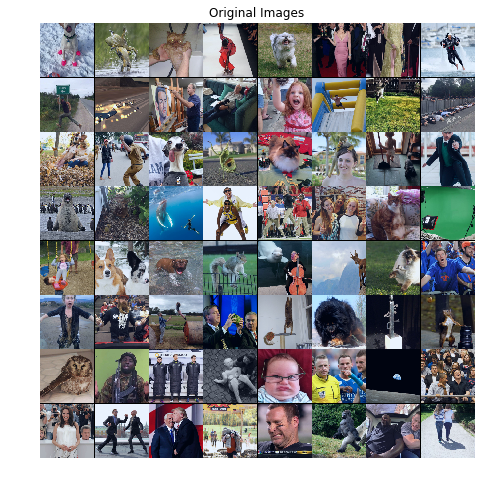

In [33]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Original Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch['A'].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

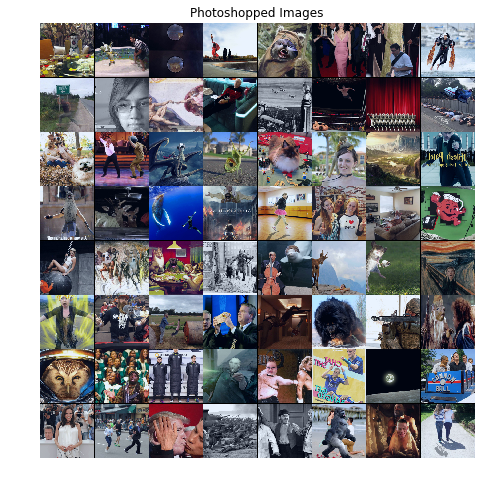

In [34]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Photoshopped Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch['B'].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

### Testing Changes to Source Code

In [36]:
from datasets import get_dataloaders
_,_,_ = Get_dataloader()

Size of master dataset: 10129
